In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/police_traffic.csv


# Questions to ask of dataset  

1) What are the top 3 most common stop outcomes?  
2) Ethnicty of driver that was stopped the most?   
3) Which gender is stopped more often?  
4) Which ethnicty group has the highest arrest rates in their respective pools?   
5) Which ethnicty group has the highest citations in their respective pools?   
6) Which gender has the highest proportion of arrests?   
7) Do males commit more speed violations than females?  
8) Does the ethnicity of drivers affect whether they are searched?   
9) Does the gender of drivers affect whether they are searched?  
10) Are drug-related stops on the rise?   

*The Dataset (csv file) contains traffic stops performed by the traffic police on Rhode Island. Data of the driver was captured, as well as the violation and if there was an arrest.*

In [74]:
# reading data from csv file using pandas
df = pd.read_csv('/kaggle/input/police_traffic.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,0,RI,2005-01-02,01:55,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
1,1,RI,2005-01-02,20:30,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4
2,2,RI,2005-01-04,11:30,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,3,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
4,4,RI,2005-01-06,01:30,NaN,M,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [75]:
# dropping unnessary 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 15 columns):
state                 509681 non-null object
stop_date             509671 non-null object
stop_time             509671 non-null object
county_name           0 non-null float64
driver_gender         480584 non-null object
driver_race           480608 non-null object
violation_raw         480608 non-null object
violation             480608 non-null object
search_conducted      509671 non-null object
search_type           17762 non-null object
stop_outcome          480608 non-null object
is_arrested           480608 non-null object
stop_duration         480608 non-null object
drugs_related_stop    509681 non-null bool
district              509681 non-null object
dtypes: bool(1), float64(1), object(13)
memory usage: 54.9+ MB


In [76]:
# Shape of dataset before cleaning is performed
df.shape

(509681, 15)

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

%matplotlib inline

## Data Cleaning and Analysis

In [78]:
# The data entries seem to be missing a few values from a couple of the features
# Show null values
print('Missing Values: \n', df.isnull().sum())

# Since we only analyzing one state, examine feature for abnormalities.
# 'state' and 'county_name' provide no value for analysis so drop them
print('\nAny odd states: \n', df['state'].value_counts())
df.drop(columns=['state', 'county_name'], inplace=True)

Missing Values: 
 state                      0
stop_date                 10
stop_time                 10
county_name           509681
driver_gender          29097
driver_race            29073
violation_raw          29073
violation              29073
search_conducted          10
search_type           491919
stop_outcome           29073
is_arrested            29073
stop_duration          29073
drugs_related_stop         0
district                   0
dtype: int64

Any odd states: 
 RI    509681
Name: state, dtype: int64


In [79]:
# 'driver_gender' is crucial for analysis, thus drop columns to avoid bias
df.dropna(subset=['driver_gender'], inplace=True)
print(df.shape)
print(df.isnull().sum())

(480584, 13)
stop_date                  0
stop_time                  0
driver_gender              0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type           462822
stop_outcome               0
is_arrested                0
stop_duration              0
drugs_related_stop         0
district                   0
dtype: int64


In [80]:
# 'search_type' shows some missing values, indicating that no search was carried out on the driver.
df['search_type'].value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

### Sort data types of the dataframe

In [81]:
# Show data types of each column
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted      object
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [82]:
# View head of dataframe to ensure the data type to be implemented
df.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
1,2005-01-02,20:30,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4


In [83]:
# 'search_conducted' and 'is_arrested' are object data types that must be converted to booleans
df[['search_conducted', 'is_arrested']] = df[['search_conducted', 'is_arrested']].astype('bool')
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [84]:
# 'stop_date' and 'stop_time' must be combined and then converted to DateTimeIndex
df['date_time'] = df['stop_date'].str.cat(df['stop_time'], sep=' ')

# converting to datetime index
df['date_time'] = pd.to_datetime(df['date_time'])

# setting new column 'date_time' to the index column
df.set_index('date_time', inplace=True)
df.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_time,,,,,,,,,,,,,
2005-01-02 01:55:00,2005-01-02,01:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
2005-01-02 20:30:00,2005-01-02,20:30,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone X4


In [126]:
# shape of dataset
print(df.shape)
# export dataset in csv format
df.to_csv('traffic_stop_data.csv')

(480584, 13)


# Analyzing Data  

## Question 1:  

Top 3 most common stop outcomes?

Citation            89.136967
Warning              6.001032
Arrest Driver        3.044213
N/D                  0.713923
No Action            0.693323
Arrest Passenger     0.410542
Name: stop_outcome, dtype: float64


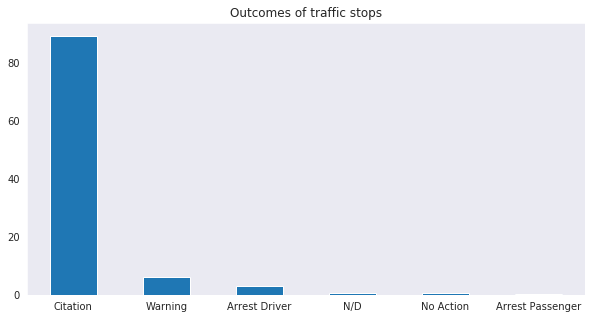

In [85]:
# Most common stops
outcomes = df['stop_outcome'].value_counts(normalize=True) * 100
print(outcomes)
outcomes.plot(kind='bar', 
             figsize=(10,5),
             rot=0,
             title='Outcomes of traffic stops');

## Quesion 1: Conclusion  

1) Outcomes of stops:   

**Top 3**  

* Citation = 89.137% 
* Warning = 6.001% 
* Arrest Driver = 3.044%   

**Bottom 3**  

* N/D = 0.713% 
* No Action = 0.693%  
* Arrest Passenger = 0.410% 

## Question 2:  

Ethnicty of driver that was stopped the most?  

White       71.728564
Black       14.269514
Hispanic    11.053843
Asian        2.668420
Other        0.279660
Name: driver_race, dtype: float64


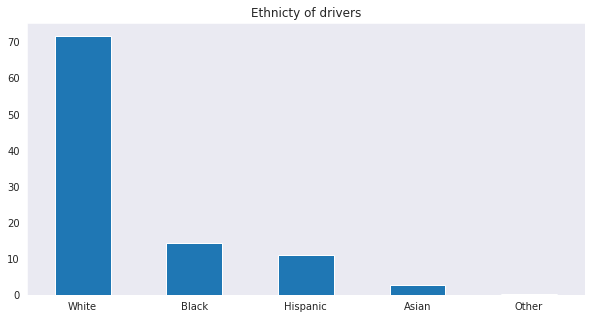

In [86]:
# ethnicity of drivers
race_outcome = df['driver_race'].value_counts(normalize=True) * 100
print(race_outcome)
# plotting race outcomes
race_outcome.plot(kind='bar', 
                  figsize=(10,5), 
                  rot=0,
                 title='Ethnicty of drivers');

## Question 2: Conclusion  

2) Ethnicties stopped:  

**Top 3**  

* White = 71.728%  
* Black = 14.689%  
* Hispanic = 11.053%  

**Bottom 3**

* Asian = 2.668%
* Other = 0.279%

## Question 3:  

Which gender is stopped more often?  


M    72.712783
F    27.287217
Name: driver_gender, dtype: float64


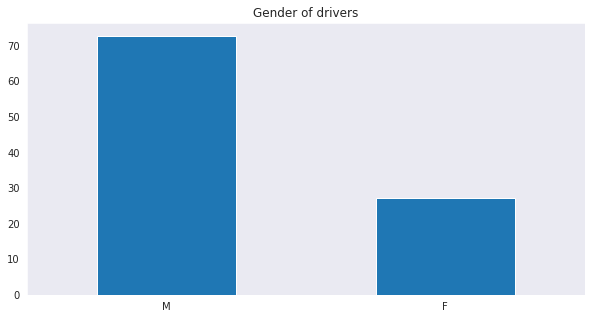

In [87]:
# Gender of drivers
gender_outcome = df['driver_gender'].value_counts(normalize=True) * 100
print(gender_outcome)

# plotting outcomes
gender_outcome.plot(kind='bar',
                   figsize=(10,5),
                   rot=0,
                   title='Gender of drivers');

## Question 3: Conclusion  


- Males are stopped more frequently and make up 72.712% of the pool.  
- Females are stopped 27.287% 

## Question 4-5:  

Which ethnicty group has the highest arrest rates in their respective pools?  
  
Which ethnicty group has the highest citations in their respective pools?  
 

### White Drivers

Citation            90.248494
Warning              5.742698
Arrest Driver        2.381381
No Action            0.672438
N/D                  0.656773
Arrest Passenger     0.298217
Name: stop_outcome, dtype: float64


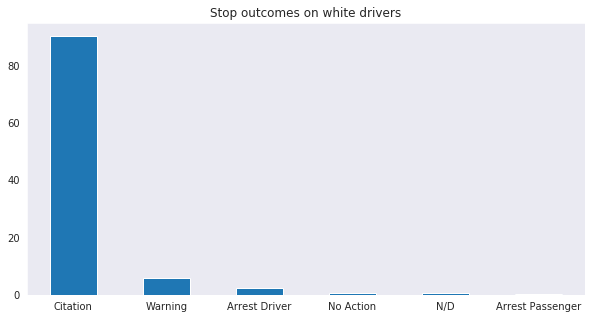

In [88]:
# white drivers
white = df[df['driver_race']=='White']
# counting perentages of outcomes
white_outcome = white['stop_outcome'].value_counts(normalize=True) * 100
print(white_outcome)

# plotting outcomes
white_outcome.plot(kind='bar',
                  figsize=(10, 5),
                  rot=0,
                  title='Stop outcomes on white drivers');

Speeding               61.814073
Moving violation       17.111767
Equipment              10.387681
Other                   4.504578
Registration/plates     3.112997
Seat belt               3.068903
Name: violation, dtype: float64


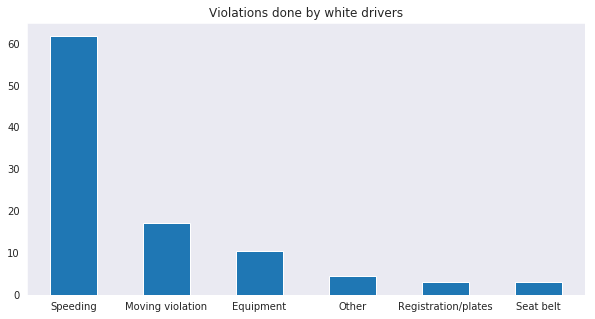

In [89]:
# violations commited by white race group
white_violation = white['violation'].value_counts(normalize=True) * 100
print(white_violation)

# plotting
white_violation.plot(kind='bar',
                    figsize=(10,5),
                    rot=0,
                    title='Violations done by white drivers');

### Black Drivers

Citation            85.849483
Warning              6.795281
Arrest Driver        4.927308
N/D                  0.908468
Arrest Passenger     0.815142
No Action            0.704318
Name: stop_outcome, dtype: float64


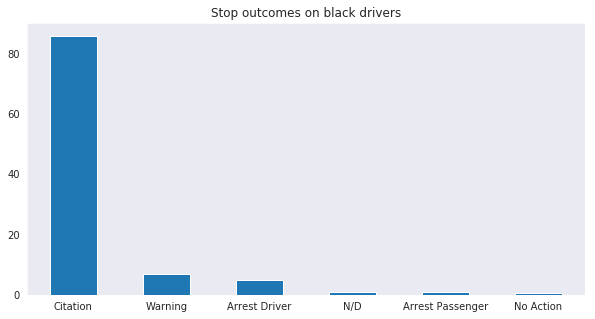

In [90]:
# black drivers
black = df[df['driver_race']=='Black']
black_outcome = black['stop_outcome'].value_counts(normalize=True)*100
print(black_outcome)

# plotting outcomes
black_outcome.plot(kind='bar',
                  figsize=(10,5),
                  rot=0,
                  title='Stop outcomes on black drivers');

Speeding               41.233941
Moving violation       23.357686
Equipment              18.068740
Other                   6.983391
Registration/plates     6.793823
Seat belt               3.562419
Name: violation, dtype: float64


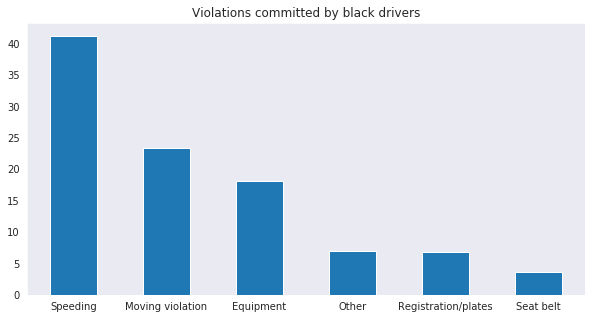

In [91]:
# violations by black drivers
black_violation = black['violation'].value_counts(normalize=True) * 100
print(black_violation)

# plotting
black_violation.plot(kind='bar',
                    figsize=(10,5),
                    rot=0,
                    title='Violations committed by black drivers');

### Hispanic Drivers

Citation            85.221091
Warning              7.100503
Arrest Driver        5.270787
N/D                  0.899799
No Action            0.837679
Arrest Passenger     0.670143
Name: stop_outcome, dtype: float64


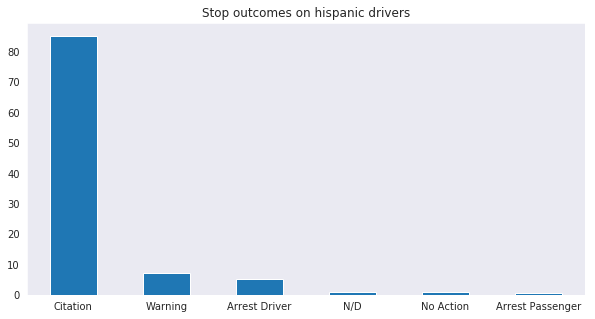

In [92]:
# Hispanic drivers
hispanic = df[df['driver_race']=='Hispanic']
hispanic_outcomes = hispanic['stop_outcome'].value_counts(normalize=True) * 100
print(hispanic_outcomes)

# plotting outcomes
hispanic_outcomes.plot(kind='bar',
                      figsize=(10,5),
                      rot=0,
                      title='Stop outcomes on hispanic drivers');

Speeding               33.475143
Moving violation       24.712460
Equipment              22.265309
Registration/plates     7.627581
Other                   6.225176
Seat belt               5.694332
Name: violation, dtype: float64


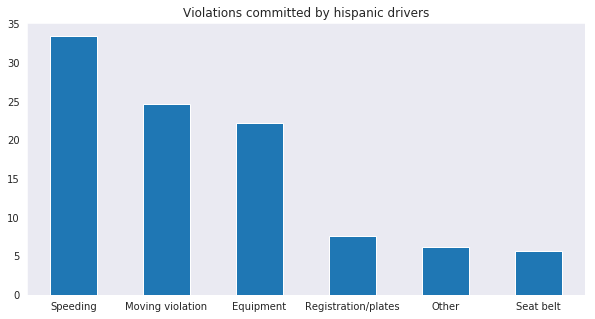

In [93]:
# violations commited by hispanic race group
hispanic_violation = hispanic['violation'].value_counts(normalize=True) * 100
print(hispanic_violation)

# plotting
hispanic_violation.plot(kind='bar',
                    figsize=(10,5),
                    rot=0,
                    title='Violations committed by hispanic drivers');

### Dataframe of violations of top 3 ethnicity groups

In [99]:
data_race_violation = pd.DataFrame({'White': white_violation, 
                         'Black': black_violation, 
                         'Hispanic': hispanic_violation,}, index=None).sort_values(by='White',
                                                                                  ascending=False)
print('Violations:')
data_race_violation

Violations:


,White,Black,Hispanic
Speeding,61.814073,41.233941,33.475143
Moving violation,17.111767,23.357686,24.712460
Equipment,10.387681,18.068740,22.265309
Other,4.504578,6.983391,6.225176
Registration/plates,3.112997,6.793823,7.627581
Seat belt,3.068903,3.562419,5.694332


### Dataframe of the outcomes of top 3 ethnicity groups

In [100]:
data_race_outcomes = pd.DataFrame({'White': white_outcome,
                                  'Black': black_outcome,
                                  'Hispanic': hispanic_outcomes}, 
                                  index=None).sort_values(by='White', 
                                                          ascending=False)

print('Outcomes:')
data_race_outcomes

Outcomes:


,White,Black,Hispanic
Citation,90.248494,85.849483,85.221091
Warning,5.742698,6.795281,7.100503
Arrest Driver,2.381381,4.927308,5.270787
No Action,0.672438,0.704318,0.837679
N/D,0.656773,0.908468,0.899799
Arrest Passenger,0.298217,0.815142,0.670143


# Question 4-5: Conclusion  

Which ethnicty group has the highest arrest rates in their respective pools?  

- Hispanics have the highest arrest rate (5.27%), followed by black drivers (4.92%), and white drivers (2.38%)   

Which ethnicty group has the highest citations in their respective pools?  

- White drivers have the highest citations (90.248%). Black drivers receive citation approximately 85.849% during stops, followed hispanic drivers at (85.22%).  

## Question 6-7:  

Which gender has the highest proportion of arrests?  
  
Do males commit more speed violations than females?

### Male Drivers

Citation            88.913022
Warning              5.902486
Arrest Driver        3.419985
N/D                  0.734591
No Action            0.655323
Arrest Passenger     0.374593
Name: stop_outcome, dtype: float64


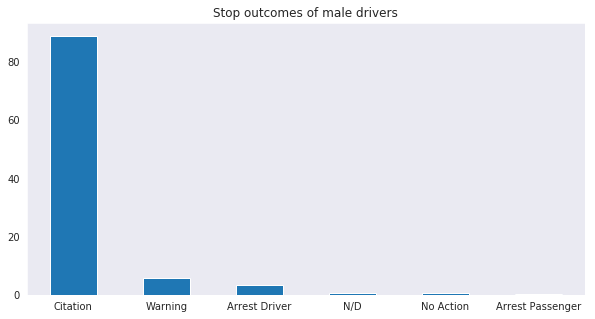

In [94]:
# Male gender
males = df[df['driver_gender']=='M']
males_outcomes = males['stop_outcome'].value_counts(normalize=True) * 100
print(males_outcomes)

# plotting outcomes
males_outcomes.plot(kind='bar',
                   figsize=(10,5),
                   rot=0,
                   title='Stop outcomes of male drivers');

Speeding               52.236397
Moving violation       20.694757
Equipment              13.510242
Other                   5.844966
Registration/plates     4.058138
Seat belt               3.655500
Name: violation, dtype: float64


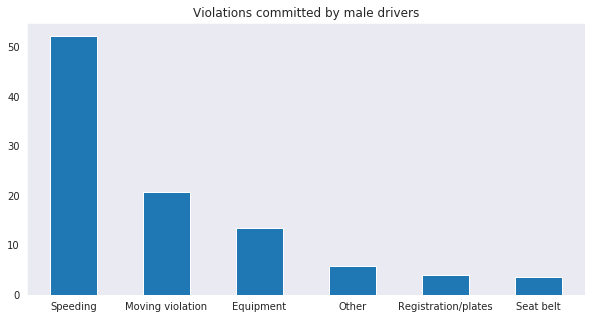

In [95]:
# violations commited by male gender group
male_violation = males['violation'].value_counts(normalize=True) * 100
print(male_violation)

# plotting
male_violation.plot(kind='bar',
                    figsize=(10,5),
                    rot=0,
                   title='Violations committed by male drivers');

### Female Drivers

Citation            89.733716
Warning              6.263631
Arrest Driver        2.042886
No Action            0.794583
N/D                  0.658848
Arrest Passenger     0.506337
Name: stop_outcome, dtype: float64


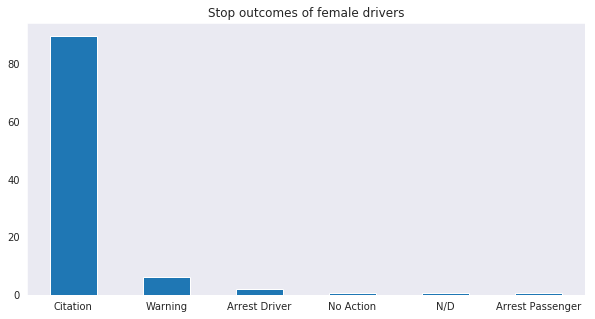

In [96]:
# Female outcomes
females = df[df['driver_gender']=='F']
females_outcomes = females['stop_outcome'].value_counts(normalize=True) * 100
print(females_outcomes)

# plotting outcomes
females_outcomes.plot(kind='bar',
                     figsize=(10,5),
                     rot=0,
                     title='Stop outcomes of female drivers');

Speeding               65.730757
Moving violation       13.658131
Equipment              10.705516
Registration/plates     4.307676
Other                   2.890848
Seat belt               2.707072
Name: violation, dtype: float64


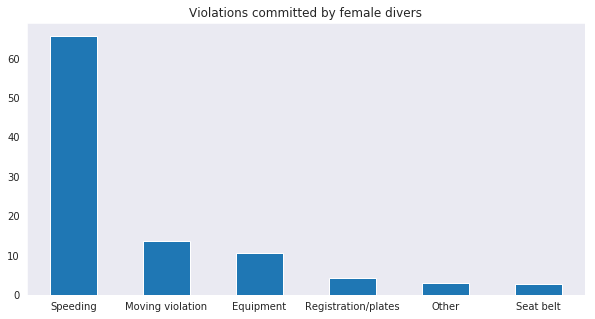

In [97]:
# violations commited by female gender group
female_violation = females['violation'].value_counts(normalize=True) * 100
print(female_violation)

# plotting
female_violation.plot(kind='bar',
                    figsize=(10,5),
                    rot=0,
                     title='Violations committed by female divers');

### DataFrame of Violations based on Gender

In [98]:
data_gender = pd.DataFrame({'Females': female_violation,
                           'Males': male_violation}, index=None).sort_values(by='Females', 
                                                                             ascending=False)
data_gender

,Females,Males
Speeding,65.730757,52.236397
Moving violation,13.658131,20.694757
Equipment,10.705516,13.510242
Registration/plates,4.307676,4.058138
Other,2.890848,5.844966
Seat belt,2.707072,3.655500


## Question 6-7: Conclusion  

Which gender has the highest proportion of arrests?   


- Male drivers have the highest arrest rate at 3.419%. While the females rate is 2.042%.  


Do males commit more speed violations than females?  

- No, the percenatage of speeding violations committed by females is 65.73%. Men are stopped for speeding about 52.236% of the time. However, men are prone to being stopped for moving violations.


## Question 8  

Does the ethnicity of drivers affect whether they are searched?  

In [101]:
# dataframe 'white' from previous analysis
white_search_rate = white['search_conducted'].value_counts(normalize=True) * 100
white_search_rate

False    97.108344
True      2.891656
Name: search_conducted, dtype: float64

In [102]:
black_search_rate = black['search_conducted'].value_counts(normalize=True) * 100
black_search_rate

False    93.715094
True      6.284906
Name: search_conducted, dtype: float64

In [103]:
hisp_search_rate = hispanic['search_conducted'].value_counts(normalize=True) * 100
hisp_search_rate

False    93.99695
True      6.00305
Name: search_conducted, dtype: float64

## Question 8: Conclusion  

1) Does the ethnicity of drivers affect whether they are searched?  

- Black drivers are searched at a higher rate of 6.284% while white drivers are searched at the lowest rate of 2.89%.  
*Its is evident that racial profiling still happens in traffic stops*

## Question 9:  

Does the gender of drivers affect whether they are searched?

In [104]:
# using the 'males' and 'females' dataframe from the previous analysis
male_search = males['search_conducted'].value_counts(normalize=True) * 100
male_search

False    95.620783
True      4.379217
Name: search_conducted, dtype: float64

In [105]:
female_search = females['search_conducted'].value_counts(normalize=True) * 100
female_search

False    98.124876
True      1.875124
Name: search_conducted, dtype: float64

In [112]:
total_frisks = df['search_type'].str.contains('Protective Frisk', na=False).sum()
total_frisks

1598

In [114]:
df_male_frisk = males[males['search_conducted'] == True]
male_frisk = df_male_frisk['search_type'].str.contains('Protective Frisk').sum()
male_frisk

1434

In [115]:
df_female_frisk = females[females['search_conducted']==True]
female_frisk = df_female_frisk['search_type'].str.contains('Protective Frisk').sum()
female_frisk

164

In [125]:
male_frisk_rate = round(male_frisk/total_frisks * 100, 3)
female_frisk_rate = round(female_frisk/total_frisks * 100, 3)
print(f'Male Frisk Rate: {male_frisk_rate}%')
print(f'Female Frisk Rate: {female_frisk_rate}%')

Male Frisk Rate: 89.737%
Female Frisk Rate: 10.263%


## Question 9: Conclusion  

1) Does the gender of drivers affect whether they are searched?  

- Yes. Females are only frisked 10.263% of the time. 
- Males tend to be searched more frequently at 89.737% compare to females.  

*This being said, males do make up for 72.712% of the drivers that are stopped. So these numbers of the frisked searched are some what proportional.*

## Question 10  


Are drug-related stops on the rise?

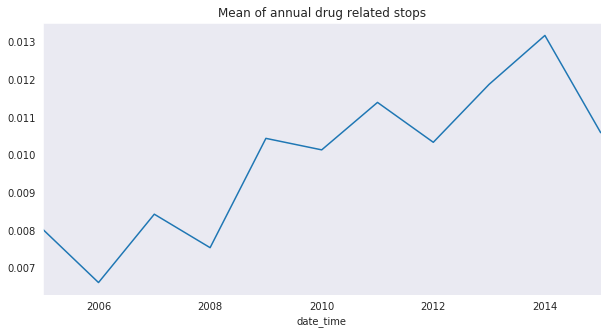

In [124]:
# drug-related stops
annual_drug_stops = df['drugs_related_stop'].resample('A').mean()
annual_drug_stops.plot(figsize=(10,5),
                      title='Mean of annual drug related stops');


## Question 10: Conclusion  

1) Are drug-related stops on the rise?   

- It is evident that there is an overall upward trend in drug related stops. drug related stops were evidently at its highest point in the year of 2014. The reason for this is that Kristen Law has died of an overdose from heroin that ws laced with fentanyl. See story here: 'https://www.pastemagazine.com/articles/2018/08/rhode-islands-new-law-that-attempts-to-stop-the-op.html'